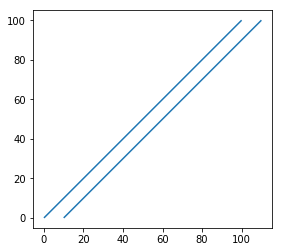

In [40]:
import geopandas as gpd
from shapely.geometry import LineString,Point
line1 = LineString([(0, 0), (50, 50), (100, 100)]) 
line2 = LineString([(10, 0), (60, 50), (110, 100)]) 
lines = gpd.GeoDataFrame()
lines['geometry'] = [line1,line2]
lines.plot()

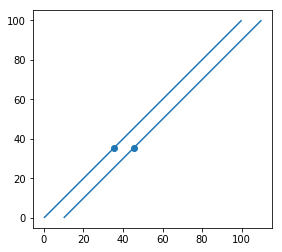

In [39]:
base=lines.plot()
points = gpd.GeoDataFrame()
points['geometry'] = [row['geometry'].interpolate(50) for idx,row in df.iterrows()]
points.plot(ax=base)

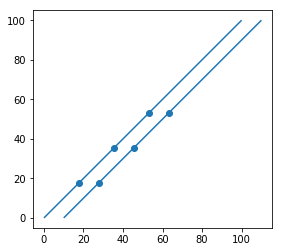

In [48]:
base=lines.plot()
points = gpd.GeoDataFrame()
intpoints=[row['geometry'].interpolate(50) for idx,row in df.iterrows()]
intpoints+=[row['geometry'].interpolate(25) for idx,row in df.iterrows()]
intpoints+=[row['geometry'].interpolate(75) for idx,row in df.iterrows()]
points['geometry'] = intpoints
points.plot(ax=base)

In [60]:
LineString([(0, 0), (50, 50), (100, 100)]).project(Point(50,0))

35.35533905932738

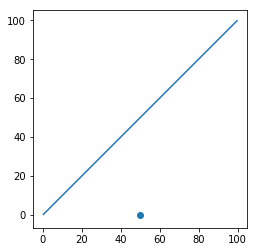

In [61]:
lines = gpd.GeoDataFrame()
lines['geometry'] = [LineString([(0, 0), (50, 50), (100, 100)])]
base=lines.plot()

points = gpd.GeoDataFrame()
points['geometry'] = [Point(50,0)]
points.plot(ax=base)


70.71067811865476

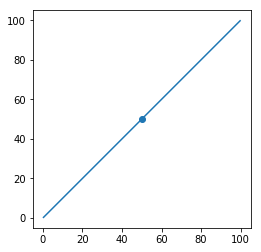

In [62]:
lines = gpd.GeoDataFrame()
lines['geometry'] = [LineString([(0, 0), (50, 50), (100, 100)])]
base=lines.plot()

points = gpd.GeoDataFrame()
points['geometry'] = [Point(50,50)]
points.plot(ax=base)
LineString([(0, 0), (50, 50), (100, 100)]).project(Point(50,50))

In [57]:
line1.project(line.interpolate(50))

50.0

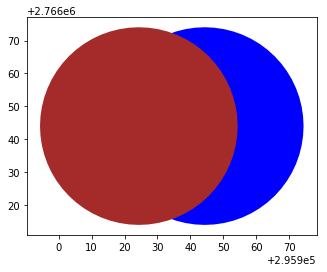

In [18]:
p1=gpd.read_file('output/Library.shp',encoding='utf-8').head(1)
p1.crs = {'init' :'epsg:4326'} # 避免資料沒設，這邊再重新給一次
p1=p1.to_crs(epsg=3826)
p1['geometry']=p1.buffer(30).translate(xoff=20.0, yoff=0.0)

p2=gpd.read_file('output/Library.shp',encoding='utf-8').head(1)
p2.crs = {'init' :'epsg:4326'} # 避免資料沒設，這邊再重新給一次
p2=p2.to_crs(epsg=3826)
p2['geometry']=p2.buffer(30)
base=p1.plot(color='blue')
p2.plot(ax=base,color='brown')

In [19]:
p1.at[0,'geometry'].relate(p2.at[0,'geometry'])

'212101212'